<a href="https://colab.research.google.com/github/nelsongf00/MNIST_HandWritten_Digits_Predictions_Using_Convoluted_Neural_Networks_SVC_And_KNN/blob/main/MNIST_Handwritten_Digits_Recognition_Using_CNN_SVC_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRCP-1002-Handwritten Digits Recognition

# MNIST Handwritten Digit Recognition Using Classification Models

## Domain Analysis

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

## The Goal of this project

The goal is to build a classifier model to better predict the MNIST dataset which is a multi-class classification dataset. We will be building a Convoluted Neural Network to predict previously unseen images and also, we will experiment with other classification models like Support Vector Machines (SVM) and K-Nearest Neighbor (KNN). Finally, we will compare all three models and see which model outperforms others.

#### Importing the basic libraries 

In [40]:
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing the MNIST dataset and storing it in train and test data 

In [41]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


## Basic Checks

In [42]:
x_train.shape

(60000, 28, 28)

Here we have a training data of 60000 images of 28 by 28 pixels

In [43]:
x_test.shape

(10000, 28, 28)

Here we have a testing data of 10000 images of 28 by 28 pixels

**Visualizing the first 48 images in our training data**

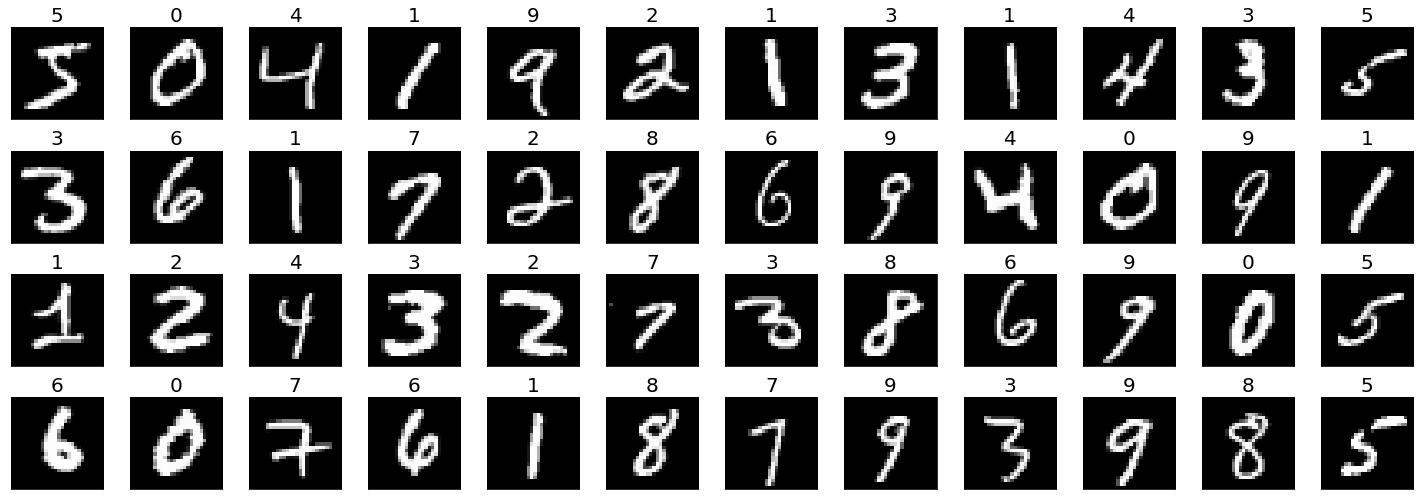

In [44]:
fig = plt.figure(figsize=(20,7))
for i in range(48):
    ax = fig.add_subplot(4, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(str(y_train[i]), fontsize=20)
plt.tight_layout()

## Data Preprocessing

We need to make our image dataset ready for our model, as such we require some data preprocessing steps to ensure it is ready to be fed in the model

#### One Hot Encoding our output data

In [45]:
from tensorflow.keras.utils import to_categorical

In [46]:
num_classes = len(np.unique(y_train))

In [47]:
y_train.shape

(60000,)

In [48]:
y_cat_train = to_categorical(y_train,num_classes)

In [49]:
y_cat_train.shape

(60000, 10)

In [50]:
y_test.shape

(10000,)

In [51]:
y_cat_test = to_categorical(y_test,num_classes)

In [52]:
y_cat_test.shape

(10000, 10)

#### Normalizing our input data

We need to scale our data so that when it is fed into the ML model, it can be processed faster.

This normalization makes it easier for the model to learn from the data, as it puts all the features on the same scale and prevents any one feature from having too much influence on the model's predictions.

In [53]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#### Reshaping our data

In [54]:
x_train = x_train.reshape(60000,28,28,1)

In [55]:
print(x_train.shape)

(60000, 28, 28, 1)


In [56]:
x_test = x_test.reshape(10000,28,28,1)

In [57]:
print(x_test.shape)

(10000, 28, 28, 1)


#### Split the data into training and validation sets

In [58]:
from sklearn.model_selection import train_test_split
(x_train, x_val, y_cat_train, y_val) = train_test_split(x_train, y_cat_train, test_size=10000, random_state=42,shuffle=True)

In [59]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')

50000 train samples
10000 test samples
10000 validation samples


## Building a Convoluted Neural Network Model to predict MNIST dataset

In [60]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(500, activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

Here we have added multiple convolutional layers with increasing number of filters, which is a good approach for increasing the model's capacity to learn complex features. 

We have also added max pooling layers after each convolutional layer to reduce the spatial dimensions and control overfitting.

The dropout layers added after the max pooling layers also help in preventing overfitting. 

The final output layer has 10 units as we are trying to classify 10 different classes.

#### Early stopping

Early stopping is a technique used to prevent overfitting in neural networks. It is used to terminate the training process of a neural network before it reaches the maximum number of epochs defined. The idea behind early stopping is to monitor the performance of the network on a validation dataset, and stop the training process when the performance on the validation set starts to decrease or degrade. This is because, as the training process continues, the model starts to overfit the training data and performs worse on unseen data such as validation set. By using early stopping, we can prevent the model from overfitting and achieve better generalization.

In [61]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',patience=2)

In [62]:
model.fit(x_train,y_cat_train,epochs = 20,callbacks=[early_stop],validation_data=(x_val,y_val))

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2585 - accuracy: 0.9170 - val_loss: 0.0794 - val_accuracy: 0.9749
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0952 - accuracy: 0.9704 - val_loss: 0.0494 - val_accuracy: 0.9846
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0681 - accuracy: 0.9779 - val_loss: 0.0382 - val_accuracy: 0.9881
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.0356 - val_accuracy: 0.9886
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0526 - accuracy: 0.9839 - val_loss: 0.0354 - val_accuracy: 0.9893
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.0323 - val_accuracy: 0.9905
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0411 - accuracy: 0.9866 - val_loss: 0.0348 - val_accuracy:

## Evaluating Our Model

In [63]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.258527,0.91700,0.079356,0.9749
1,0.095195,0.97040,0.049351,0.9846
2,0.068083,0.97786,0.038233,0.9881
3,0.059052,0.98120,0.035595,0.9886
4,0.052627,0.98386,0.035450,0.9893
5,0.043713,0.98588,0.032278,0.9905
6,0.041110,0.98662,0.034790,0.9905
7,0.037175,0.98782,0.034708,0.9895


**Comparing our training and validation loss & accuracy:**

Here we can see that the validation accuracy is very close to the training accuracy, indicating that the model is likely not overfitting. 

Additionally, the validation loss is decreasing over time, which is a good sign that the model is generalizing well.

Moreover we have ensured early stopping & dropout mechanism to prevent overfitting.

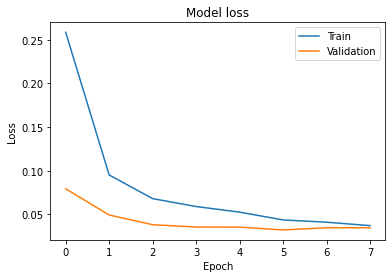

In [64]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

Here we can see that the train data and validation data are starting to level off at the epochs

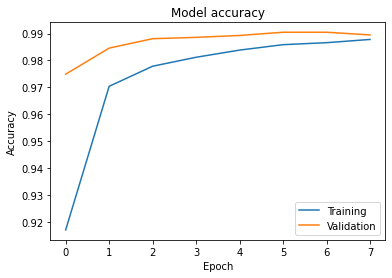

In [65]:
plt.plot(model.history.history['accuracy'], label='Training')
plt.plot(model.history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Evaluating the model on test data

In [66]:
score = model.evaluate(x_test,y_cat_test,verbose=0)

In [67]:
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.032020971179008484 / Test accuracy: 0.9902999997138977


#### Precision,Recall and F1-Score

In [68]:
from sklearn.metrics import classification_report

# Get the predicted labels for the test set
predictions = model.predict(x_test)
# Convert the predictions to class labels
y_pred_CNN = np.argmax(predictions, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_CNN))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Here we can see all the classes has more that 97% precision, Recall and F1 Score. Also our model accuracy as 99%.

## Making Predictions

### 1) We will Predict digits based on previous unseen images from our dataset

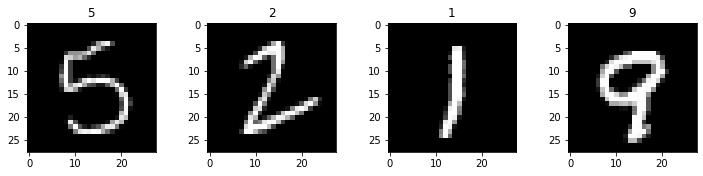

In [69]:
use_samples = [53, 38, 393, 273]

samples_to_predict = []

# Create a figure with 4 subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,6))

# Flatten the axes array so that we can iterate over it easily
axes = axes.ravel()

for i, sample in enumerate(use_samples):
    axes[i].imshow(x_test[sample].reshape(28,28),cmap='gray')
    axes[i].set_title(y_test[sample])
    samples_to_predict.append(x_test[sample])
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [70]:
samples_to_predict = np.array(samples_to_predict)

In [71]:
print(samples_to_predict.shape)

(4, 28, 28, 1)


In [72]:
predictions = model.predict(samples_to_predict)
print(predictions);

1/1 [==============================] - 0s 14ms/step
[[5.75658721e-09 7.70060815e-09 9.82403568e-12 5.43245988e-05
  1.01569162e-08 9.99933600e-01 1.38661855e-08 1.18316990e-09
  3.05991136e-07 1.17909130e-05]
 [4.05606988e-06 8.67965718e-05 9.99908924e-01 2.07102224e-09
  3.42903395e-09 8.08132866e-11 9.56848254e-08 1.86018653e-07
  2.08936068e-09 1.59369018e-10]
 [2.36077802e-09 9.99998450e-01 1.15467396e-08 1.34157441e-09
  1.30276294e-06 2.32889121e-08 9.55651114e-09 8.61686189e-08
  6.81914836e-09 1.03003941e-07]
 [1.26587182e-07 1.25723174e-08 1.19629533e-08 4.25849549e-07
  7.32782792e-06 5.17309695e-10 3.28052620e-11 5.07638015e-06
  5.36303814e-05 9.99933362e-01]]


In [73]:
# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(f"Our model is predicting the numbers to be {classes}")

Our model is predicting the numbers to be [5 2 1 9]


**Here our model correctly predicted all four previouly unseen images**

### 2) We will Predict a digit based on image downloaded from internet

In [74]:
from urllib.request import urlopen
from PIL import Image

url = "https://i.postimg.cc/6pG37bWD/2.jpg"
with urlopen(url) as url:
    with open("2.jpg", "wb") as f:
        f.write(url.read())

img = Image.open("2.jpg")

# Converting to Greyscale
img = img.convert('L')


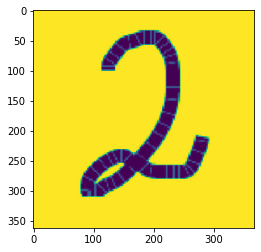

In [75]:
plt.imshow(img)

In [76]:
#resize the image
img = img.resize((28,28))
#convert to numpy array and normalize the pixel values
img_array = np.array(img)/255.0
#expand the dimensions of the array
img_array = np.expand_dims(img_array, axis=0)
# reshaping our image as according to our train data
img_array = img_array.reshape(1,28,28,1)

# making prediction based on our trained model
predictions = model.predict(img_array)
pred = np.argmax(predictions, axis=1)

print(f"Our Trained Model is predicting the image as {pred[0]}")

1/1 [==============================] - 0s 17ms/step
Our Trained Model is predicting the image as 2


**Here our model correctly predicted the random digit image from the internet 99% of the time**

## Experimenting the MNIST Dataset with Support Vector Classifier Model

In [77]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test_SVM) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Randomly pick 5000 images from the training set
random_indices = np.random.choice(60000, 5000, replace=False)
x_train = x_train[random_indices]
y_train = y_train[random_indices]

# Define the SVM model
clf = SVC(kernel='linear', C=1)

# Perform the grid search
grid_search_SVM = GridSearchCV(clf, {'C': [0.1, 1, 10, 100],'kernel': ['linear', 'rbf']}, cv=3, n_jobs=-1)
grid_search_SVM.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search_SVM.best_params_)
print("Best score: ", grid_search_SVM.best_score_)

# Evaluate the model on the test set
y_pred_SVM = grid_search_SVM.predict(x_test)
accuracy = accuracy_score(y_test_SVM, y_pred_SVM)
print('Accuracy:', accuracy)


Best parameters:  {'C': 10, 'kernel': 'rbf'}
Best score:  0.9441997554870779
Accuracy: 0.9606


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test_SVM, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.94      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.95      0.96      0.95       892
           6       0.96      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



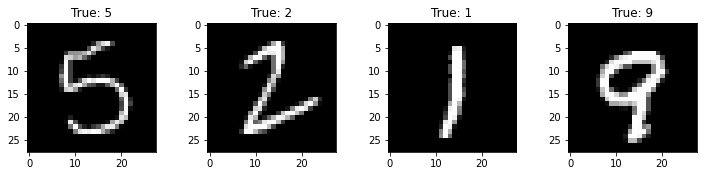

In [79]:
use_samples = [53, 38, 393, 273]

samples_to_predict = []

# Create a figure with 4 subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,6))

# Flatten the axes array so that we can iterate over it easily
axes = axes.ravel()

for i, sample in enumerate(use_samples):
    axes[i].imshow(x_test[sample].reshape(28,28), cmap='gray') # changed (1,784) to (28,28)
    axes[i].set_title("True: {}".format(y_test[sample])) # changed [sample] to y_test[sample]
    samples_to_predict.append(x_test[sample].reshape(1, 784)) # changed x_test[sample] to x_test[sample].reshape(1, 784)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


In [80]:
samples_to_predict = np.array(samples_to_predict).reshape(len(use_samples), 784)
predictions = grid_search_SVM.predict(samples_to_predict)
print(predictions);

[5 2 1 9]


## Experimenting the MNIST Dataset with K-Nearest Neighbor Classifier Model

In [81]:
from sklearn.neighbors import KNeighborsClassifier

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test_KNN) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Randomly pick 5000 images from the training set
random_indices = np.random.choice(60000, 5000, replace=False)
x_train = x_train[random_indices]
y_train = y_train[random_indices]

# Define the KNN model
clf = KNeighborsClassifier(n_neighbors=5)

# Perform the grid search
grid_search_KNN = GridSearchCV(clf, {'n_neighbors': [3, 5, 7, 9]}, cv=3, n_jobs=-1)
grid_search_KNN.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search_KNN.best_params_)
print("Best score: ", grid_search_KNN.best_score_)

# Evaluate the model on the test set
y_pred_KNN = grid_search_KNN.predict(x_test)
accuracy = accuracy_score(y_test_KNN, y_pred_KNN)
print('Accuracy:', accuracy)


Best parameters:  {'n_neighbors': 3}
Best score:  0.9190005936387754
Accuracy: 0.9336


In [82]:
print(classification_report(y_test_KNN, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.90      1.00      0.95      1135
           2       0.96      0.91      0.93      1032
           3       0.92      0.94      0.93      1010
           4       0.93      0.91      0.92       982
           5       0.93      0.93      0.93       892
           6       0.97      0.97      0.97       958
           7       0.93      0.93      0.93      1028
           8       0.97      0.85      0.90       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



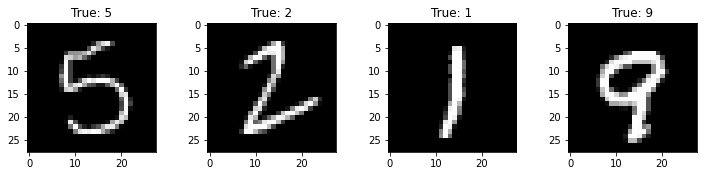

In [83]:
use_samples = [53, 38, 393, 273]

samples_to_predict = []

# Create a figure with 4 subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,6))

# Flatten the axes array so that we can iterate over it easily
axes = axes.ravel()

for i, sample in enumerate(use_samples):
    axes[i].imshow(x_test[sample].reshape(28,28), cmap='gray') # changed (1,784) to (28,28)
    axes[i].set_title("True: {}".format(y_test[sample])) # changed [sample] to y_test[sample]
    samples_to_predict.append(x_test[sample].reshape(1, 784)) # changed x_test[sample] to x_test[sample].reshape(1, 784)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


In [84]:
samples_to_predict = np.array(samples_to_predict).reshape(len(use_samples), 784)
predictions = grid_search_KNN.predict(samples_to_predict)
print(predictions);

[5 3 1 9]


## Model Comparison Report

For our MNIST handwritten digit classification dataset we have experimented with three different models like convoluted neural network (CNN), support vector classifier (SVC) and k-nearest neighbor (KNN) and we have found that CNN model outperforms other models. CNN model is giving us an accuracy score of 99% whereas other models like SVC and KNN are giving us around 96% and 94% respectively. Also CNN model correctly predicted previous unseen image data; but SVC and KNN were giving out incorrect predictions sometimes. We should look at the confusion matrix for all our models to better understand our findings

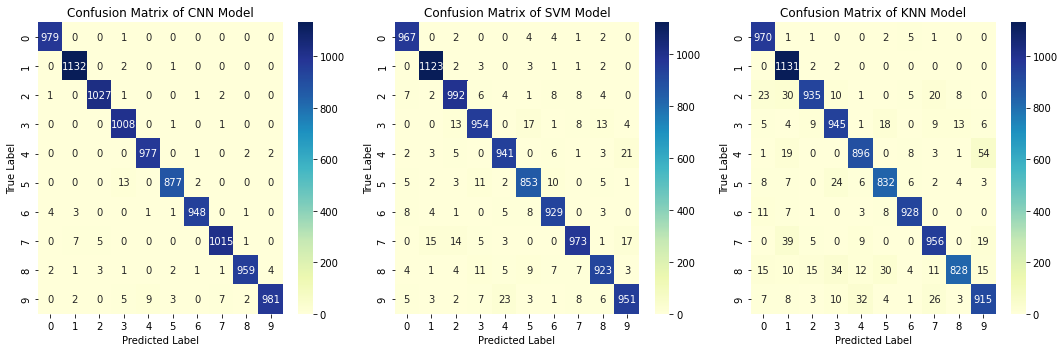

In [85]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrices
confusion_CNN = confusion_matrix(y_test, y_pred_CNN)
confusion_SVM = confusion_matrix(y_test_SVM, y_pred_SVM)
confusion_KNN = confusion_matrix(y_test_KNN, y_pred_KNN)

# Plot the confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

sns.heatmap(confusion_CNN, annot=True, fmt="d", cmap="YlGnBu", ax=ax1)
ax1.set_xlabel("Predicted Label")
ax1.set_ylabel("True Label")
ax1.set_title("Confusion Matrix of CNN Model")

sns.heatmap(confusion_SVM, annot=True, fmt="d", cmap="YlGnBu", ax=ax2)
ax2.set_xlabel("Predicted Label")
ax2.set_ylabel("True Label")
ax2.set_title("Confusion Matrix of SVM Model")

sns.heatmap(confusion_KNN, annot=True, fmt="d", cmap="YlGnBu", ax=ax3)
ax3.set_xlabel("Predicted Label")
ax3.set_ylabel("True Label")
ax3.set_title("Confusion Matrix of KNN Model")

plt.tight_layout()
plt.show()


## Our FIndings

In the above confusion matrixes, we can see that: 

1) CNN model is performing the best and it is less prone to errors. 

2) SVM Model performed well but it is having a hard time predicting the digit 3,4,7,9

3) KNN model performed the worst out of the other two models as it is giving out false predictions for many times for various digits like 3,4,5,9 

## Report on Challenges faced

Here are some of the challenges we faced while doing this project:

1) It is a big data set as such took a long time to train.

2) Model was overfitting too much we had to take corrective measures frequently. We created a separate notebook where we down-sized the training and testing data by 5,000 images so that we can experiment on the hyperparameters, then after getting satisfatory results we fitted the same hyperparameter with our original notebook which had all 60,000 images.

3) Using our CNN model we wanted to predict a completely unseen handwritten image from the internet, however getting the image in jupyter notebook/collab was a challenge. took long time to fix this issue. We have hosted the image of digit in postimg.cc and from there we are pulling it in our notebook.
